### League Of Legends Analytics
_________________________________________________
#### League of Legends (LOL) é um MOBA mundialmente famoso, que movimenta cerca de 100 milhões de usuários por mês. É um mercado milionário e que vem sendo cada vez mais alvo de investimentos. A propria desenvolvedora fornece uma API gratuita (limitada), com os dados das partidas (https://developer.riotgames.com)
#### Para conhecer mais sobre o jogo : https://towardsdatascience.com/what-is-like-to-be-a-data-scientist-with-a-passion-for-gaming-43c067ad6415

#### Já existem inúmeros serviços que apresentem analises estatistica para o jogador.
- https://www.leagueofgraphs.com/pt/
- https://blitz.gg/lol

##### Todas as bases utilizadas aqui foram adquiridas via código desenvolvido pela dupla. Presente em : Crawler Data.py

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

____________
#### Nesa etapa iremos fazer a definição de tipos, bem como o tratamentos dos dados faltantes,normalização, discretização e limpeza do dados. Todo o pré processamento.

In [2]:
###Essa base é a base seed, através dos ids dos jogadores, iremos fazer os joins até chegar
###na base final utilizada nessa etapa
df_users_seed = pd.read_csv("data/SummonerFinalData.csv", index_col = 'accountId')

### Lista das 10 ultimas partidas de cada jogador na base seed. 
df_matches_acc_id = pd.read_csv("data/matchByAccounbtIdFiltered10.csv", index_col = 'accountId')

### Estatisticas de cada time dentro das partidas
df_match_stats = pd.read_csv("data/dataMatchesStats.csv", index_col = 'gameId')

### Estatisticas 
df_players_matches_stats = pd.read_csv("data/playersMatchesStats.csv", index_col = 'gameId')

In [3]:
####Print de algumas informações basicas######
df_users_seed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2661 entries, bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc to WE0_mGLrx0GnG2FwOEx64d5k3AQ2kkEvcEfZPDqBc_w
Data columns (total 13 columns):
Unnamed: 0       2661 non-null int64
tier             2661 non-null object
summonerId       2661 non-null object
summonerName     2661 non-null object
leaguePoints     2661 non-null int64
wins             2661 non-null int64
losses           2661 non-null int64
veteran          2661 non-null bool
inactive         2661 non-null bool
freshBlood       2661 non-null bool
hotStreak        2661 non-null bool
summonerLevel    2661 non-null int64
puuid            2661 non-null object
dtypes: bool(4), int64(5), object(4)
memory usage: 218.3+ KB


In [4]:
df_matches_acc_id.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 53720 entries, bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc to WE0_mGLrx0GnG2FwOEx64d5k3AQ2kkEvcEfZPDqBc_w
Data columns (total 8 columns):
platformId    53720 non-null object
gameId        53720 non-null int64
champion      53720 non-null int64
queue         53720 non-null int64
season        53720 non-null int64
timestamp     53720 non-null int64
role          53720 non-null object
lane          53720 non-null object
dtypes: int64(5), object(3)
memory usage: 3.7+ MB


In [5]:
df_match_stats.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60654 entries, 2063497560 to 2072543892
Data columns (total 16 columns):
teamId                  60654 non-null int64
win                     60652 non-null object
firstBlood              60654 non-null bool
firstTower              60654 non-null bool
firstInhibitor          60654 non-null bool
firstBaron              60654 non-null bool
firstDragon             60654 non-null bool
firstRiftHerald         60654 non-null bool
towerKills              60654 non-null int64
inhibitorKills          60654 non-null int64
baronKills              60654 non-null int64
dragonKills             60654 non-null int64
vilemawKills            60654 non-null int64
riftHeraldKills         60654 non-null int64
dominionVictoryScore    60654 non-null int64
bans                    60654 non-null object
dtypes: bool(6), int64(8), object(2)
memory usage: 5.4+ MB


In [6]:
df_players_matches_stats.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303252 entries, 2063497560 to 2072543892
Data columns (total 13 columns):
champion              303252 non-null int64
spell1                303252 non-null int64
spell2                303252 non-null int64
win                   303252 non-null bool
kills                 303252 non-null int64
deaths                303252 non-null int64
assists               303252 non-null int64
totalDamageDealt      303252 non-null int64
goldEarned            303252 non-null int64
champLevel            303252 non-null int64
totalMinionsKilled    303252 non-null int64
item0                 303252 non-null int64
item1                 303252 non-null int64
dtypes: bool(1), int64(12)
memory usage: 30.4 MB


In [7]:
####Dropando essa coluna intrusa
df_users_seed.drop('Unnamed: 0', axis = 1, inplace=True)

### Ajuste de Tipos
- O ajuste de tipo é parte fundamental da estruturação dos dados. Evita falhas ao fazer calculos, comparações, join e etc. Além de porder otimizar armazenamento e processamento dos dados. 
---------

In [8]:
### Ajuste de tipos da base de usuários

df_users_seed['tier'] = df_users_seed['tier'].astype('category')
df_users_seed['summonerId'] = df_users_seed['summonerId'].astype('str')
df_users_seed['summonerName'] = df_users_seed['summonerName'].astype('str')
df_users_seed['puuid'] = df_users_seed['puuid'].astype('str')

print(df_users_seed.dtypes)
print(df_users_seed['tier'].cat.categories)

tier             category
summonerId         object
summonerName       object
leaguePoints        int64
wins                int64
losses              int64
veteran              bool
inactive             bool
freshBlood           bool
hotStreak            bool
summonerLevel       int64
puuid              object
dtype: object
Index(['DIAMONDI', 'DIAMONDII', 'DIAMONDIII', 'DIAMONDIV', 'MASTER'], dtype='object')


In [9]:
### Ajuste de tipos da lista de partidas
df_matches_acc_id['gameId'] = df_matches_acc_id['gameId'].astype('str')
df_matches_acc_id['platformId'] = df_matches_acc_id['platformId'].astype('str')
df_matches_acc_id['role'] = df_matches_acc_id['role'].astype('category')
df_matches_acc_id['lane'] = df_matches_acc_id['lane'].astype('category')
df_matches_acc_id['champion'] = df_matches_acc_id['champion'].astype('category')

print(df_matches_acc_id.dtypes)
print(df_matches_acc_id['role'].cat.categories)
print(df_matches_acc_id['lane'].cat.categories)

platformId      object
gameId          object
champion      category
queue            int64
season           int64
timestamp        int64
role          category
lane          category
dtype: object
Index(['DUO', 'DUO_CARRY', 'DUO_SUPPORT', 'NONE', 'SOLO'], dtype='object')
Index(['BOTTOM', 'JUNGLE', 'MID', 'NONE', 'TOP'], dtype='object')


In [10]:
### Ajuste d etipos das estatisticas da partida
df_match_stats['win'] = df_match_stats['win'].astype('category')
df_match_stats['teamId'] = df_match_stats['teamId'].astype('str')
print(df_match_stats.dtypes)
print(df_match_stats['win'].cat.categories)

teamId                    object
win                     category
firstBlood                  bool
firstTower                  bool
firstInhibitor              bool
firstBaron                  bool
firstDragon                 bool
firstRiftHerald             bool
towerKills                 int64
inhibitorKills             int64
baronKills                 int64
dragonKills                int64
vilemawKills               int64
riftHeraldKills            int64
dominionVictoryScore       int64
bans                      object
dtype: object
Index(['Fail', 'Win'], dtype='object')


In [11]:
df_players_matches_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303252 entries, 2063497560 to 2072543892
Data columns (total 13 columns):
champion              303252 non-null int64
spell1                303252 non-null int64
spell2                303252 non-null int64
win                   303252 non-null bool
kills                 303252 non-null int64
deaths                303252 non-null int64
assists               303252 non-null int64
totalDamageDealt      303252 non-null int64
goldEarned            303252 non-null int64
champLevel            303252 non-null int64
totalMinionsKilled    303252 non-null int64
item0                 303252 non-null int64
item1                 303252 non-null int64
dtypes: bool(1), int64(12)
memory usage: 30.4 MB


In [12]:
### Ajuste d etipos das estatisticas detalhadas da partida
df_players_matches_stats['champion'] = df_players_matches_stats['champion'].astype('category')
df_players_matches_stats['spell1'] = df_players_matches_stats['spell1'].astype('category')
df_players_matches_stats['spell2'] = df_players_matches_stats['spell2'].astype('category')
df_players_matches_stats['item0'] = df_players_matches_stats['item0'].astype('category')
df_players_matches_stats['item1'] = df_players_matches_stats['item1'].astype('category')

In [13]:
print(df_players_matches_stats.dtypes)
print(df_players_matches_stats['champion'].cat.categories)
print(df_players_matches_stats['spell1'].cat.categories)
print(df_players_matches_stats['spell2'].cat.categories)

champion              category
spell1                category
spell2                category
win                       bool
kills                    int64
deaths                   int64
assists                  int64
totalDamageDealt         int64
goldEarned               int64
champLevel               int64
totalMinionsKilled       int64
item0                 category
item1                 category
dtype: object
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            497, 498, 516, 517, 518, 523, 555, 777, 875, 876],
           dtype='int64', length=151)
Int64Index([0, 1, 3, 4, 6, 7, 11, 12, 13, 14, 21, 32], dtype='int64')
Int64Index([0, 1, 3, 4, 6, 7, 11, 12, 13, 14, 21, 32], dtype='int64')


### Checagem de dados faltantes
- Muitas vezes ao coletar dados, encontramos colunas com dados faltantes. Como a nossas bases foram construidas através de api (vale ressaltar que uma api oficial), não possuímos dados faltantes. Sendo assim não precisamos aplicar nenhuma tecnica pra preencher esses dados. A titulo de segurança vamos ver a % de dados faltantes em cada dataset
-----------

In [14]:
def getMissData(df):
     return pd.DataFrame({'names' : df.columns, 'types' : df.dtypes, 'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})

In [15]:
### Dados faltantes
getMissData(df_users_seed)

,names,types,NA #,NA %
tier,tier,category,0,0.0
summonerId,summonerId,object,0,0.0
summonerName,summonerName,object,0,0.0
leaguePoints,leaguePoints,int64,0,0.0
wins,wins,int64,0,0.0
losses,losses,int64,0,0.0
veteran,veteran,bool,0,0.0
inactive,inactive,bool,0,0.0
freshBlood,freshBlood,bool,0,0.0
hotStreak,hotStreak,bool,0,0.0


In [16]:
getMissData(df_matches_acc_id)

,names,types,NA #,NA %
platformId,platformId,object,0,0.0
gameId,gameId,object,0,0.0
champion,champion,category,0,0.0
queue,queue,int64,0,0.0
season,season,int64,0,0.0
timestamp,timestamp,int64,0,0.0
role,role,category,0,0.0
lane,lane,category,0,0.0


In [17]:
getMissData(df_match_stats)

,names,types,NA #,NA %
teamId,teamId,object,0,0.000000
win,win,category,2,0.003297
firstBlood,firstBlood,bool,0,0.000000
firstTower,firstTower,bool,0,0.000000
firstInhibitor,firstInhibitor,bool,0,0.000000
firstBaron,firstBaron,bool,0,0.000000
firstDragon,firstDragon,bool,0,0.000000
firstRiftHerald,firstRiftHerald,bool,0,0.000000
towerKills,towerKills,int64,0,0.000000
inhibitorKills,inhibitorKills,int64,0,0.000000


In [18]:
getMissData(df_players_matches_stats)

,names,types,NA #,NA %
champion,champion,category,0,0.0
spell1,spell1,category,0,0.0
spell2,spell2,category,0,0.0
win,win,bool,0,0.0
kills,kills,int64,0,0.0
deaths,deaths,int64,0,0.0
assists,assists,int64,0,0.0
totalDamageDealt,totalDamageDealt,int64,0,0.0
goldEarned,goldEarned,int64,0,0.0
champLevel,champLevel,int64,0,0.0


## Detecção de Outliers

**Base de Usuários**

In [19]:
df_users_seed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2661 entries, bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc to WE0_mGLrx0GnG2FwOEx64d5k3AQ2kkEvcEfZPDqBc_w
Data columns (total 12 columns):
tier             2661 non-null category
summonerId       2661 non-null object
summonerName     2661 non-null object
leaguePoints     2661 non-null int64
wins             2661 non-null int64
losses           2661 non-null int64
veteran          2661 non-null bool
inactive         2661 non-null bool
freshBlood       2661 non-null bool
hotStreak        2661 non-null bool
summonerLevel    2661 non-null int64
puuid            2661 non-null object
dtypes: bool(4), category(1), int64(4), object(3)
memory usage: 179.5+ KB


**Existem 2 variáveis que podem ser consideradas outliers, Wins e Losses. Summoner Level não entra nessa detecção, pois até certo ponto ele tinha um limite de 30 e os valores, quaisquer que sejam, são importantes para os testes de hipotese.**

**Então vamos analisar as vitórias e derrotas do jogador**

In [20]:
df_users_seed[['wins','losses']].describe()

,wins,losses
count,2661.000000,2661.000000
mean,320.681323,290.610673
std,207.561816,206.441510
min,20.000000,8.000000
25%,172.000000,141.000000
50%,269.000000,239.000000
75%,421.000000,390.000000
max,1363.000000,1338.000000


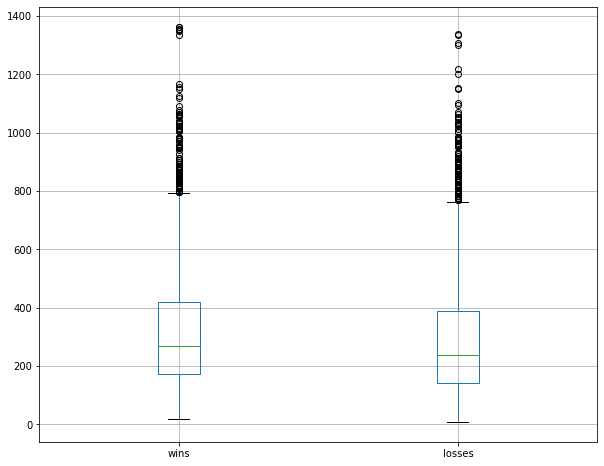

In [21]:
df_users_seed.boxplot(column=['wins', 'losses'],figsize=(10,8))

**Como alguns player jogam a mais tempo, não podemos analisar esses números isoladamente, por isso vamos ver em relação ao tempo de jogo, que podemos considerar como o Summoner Level**

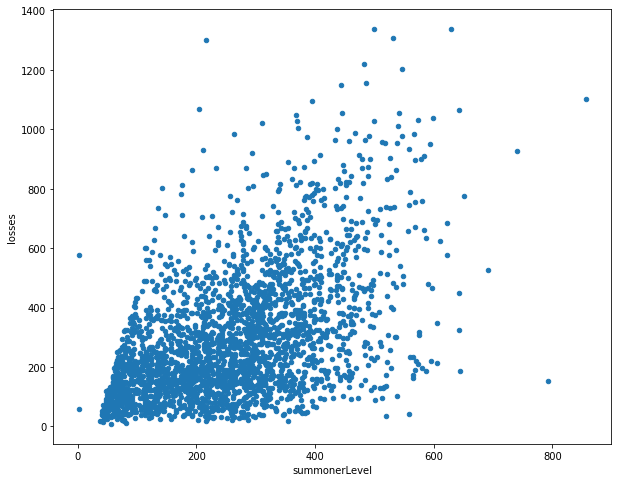

In [22]:
df_users_seed.plot.scatter(x='summonerLevel', y='losses',figsize=(10,8))

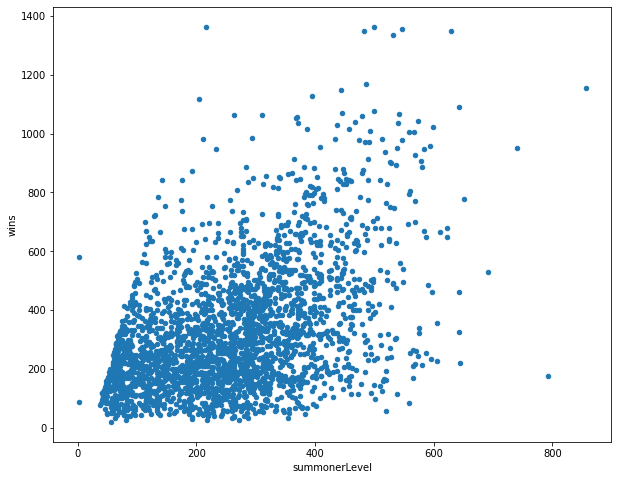

In [23]:
df_users_seed.plot.scatter(x='summonerLevel', y='wins',figsize=(10,8))

**O problema de usar o summoner level é porque até um certo tempo, existia um limite de level no League of Legends, onde jogadores podiam chegar somente até o level 30, mas o número de vitorias e derrotas continuava subindo. Por conta desse limite, faz sentido tentarmos agrupar por tiers**


In [24]:
df_users_by_tier = df_users_seed.groupby(['tier'])
df_users_by_tier[['wins','losses']].mean()

,wins,losses
tier,,
DIAMONDI,276.444444,252.752525
DIAMONDII,238.631313,220.585859
DIAMONDIII,224.860697,210.104478
DIAMONDIV,212.213198,200.507614
MASTER,355.835565,320.226567


DIAMONDI           AxesSubplot(0.1,0.679412;0.363636x0.220588)
DIAMONDII     AxesSubplot(0.536364,0.679412;0.363636x0.220588)
DIAMONDIII         AxesSubplot(0.1,0.414706;0.363636x0.220588)
DIAMONDIV     AxesSubplot(0.536364,0.414706;0.363636x0.220588)
MASTER                 AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

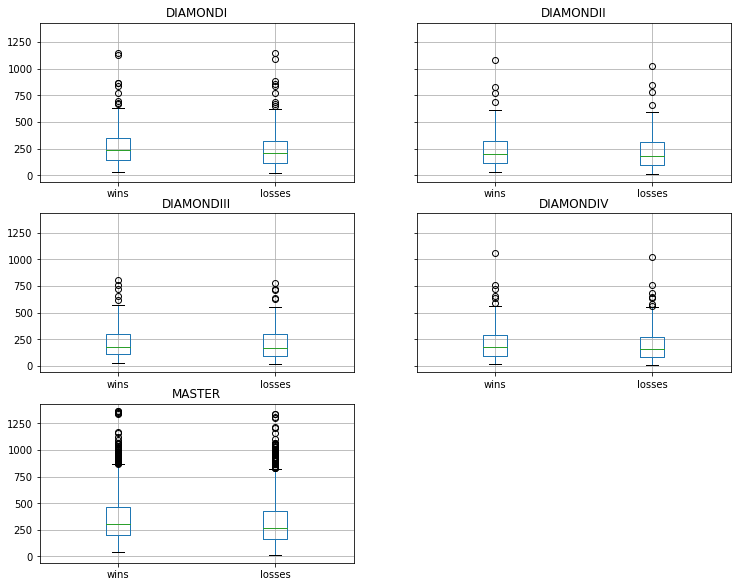

In [25]:
df_users_by_tier.boxplot(column=['wins','losses'],figsize=(12,10))

**Por tier nós entramos na questão se o jogador é bom ou não, então vale a pena vermos a relação entre as duas variáveis**

tier
DIAMONDI      AxesSubplot(0.125,0.125;0.775x0.755)
DIAMONDII     AxesSubplot(0.125,0.125;0.775x0.755)
DIAMONDIII    AxesSubplot(0.125,0.125;0.775x0.755)
DIAMONDIV     AxesSubplot(0.125,0.125;0.775x0.755)
MASTER        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

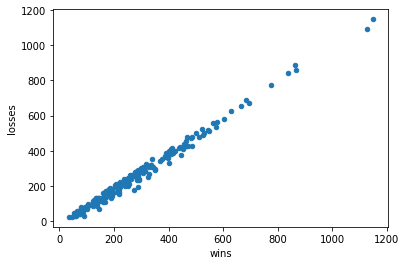

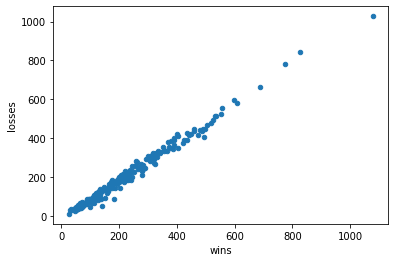

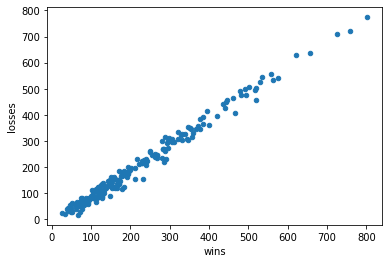

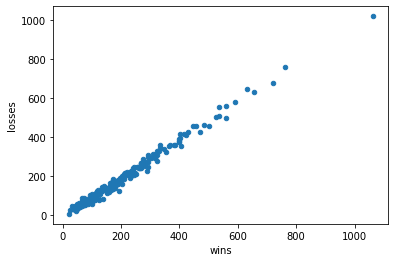

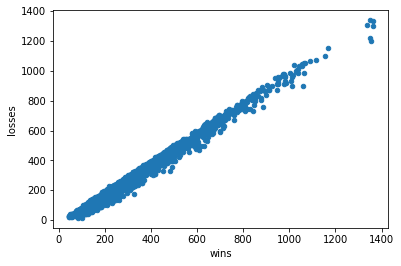

In [26]:
df_users_seed.groupby('tier').plot.scatter(x='wins', y='losses')

**Pelo grafico, podemos ver que o mais comum é a pessoa ter a mesma quantidade de vitórias que derrotas, então os valores não são necessáriamente outliers. Como último passo, iremos verificar o win rate do jogador, ou seja, quantas vitórias ele tem em relação ao total de partidas**

In [27]:
df_users_seed['win_rate'] = df_users_seed['wins']/(df_users_seed['wins'] + df_users_seed['losses'])
print(len(df_users_seed))

2661


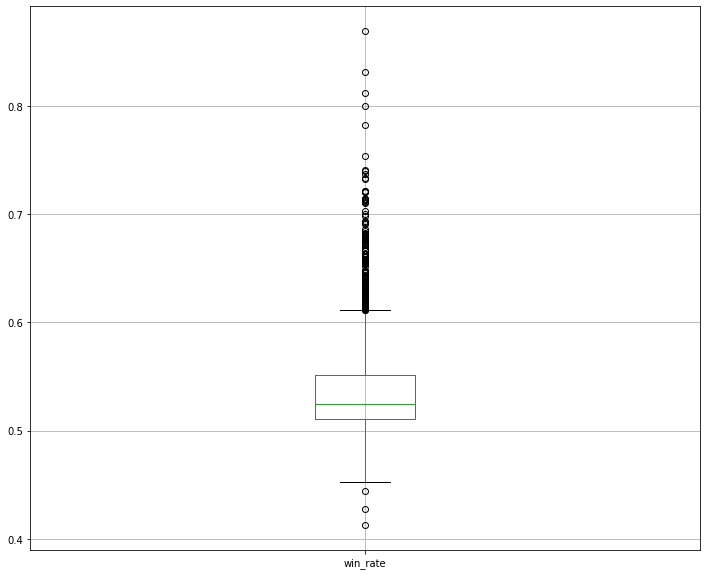

In [28]:
df_users_seed.boxplot(column=['win_rate'],figsize=(12,10))

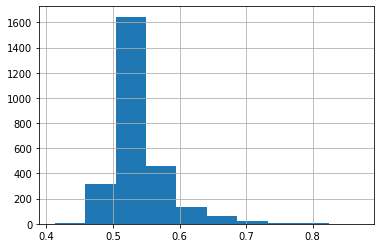

In [29]:
df_users_seed['win_rate'].hist()

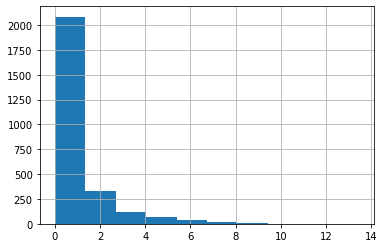

In [30]:
mad = abs(df_users_seed['win_rate'] - df_users_seed['win_rate'].median()).median()*(1/0.6745)
(abs(df_users_seed['win_rate']-df_users_seed['win_rate'].median())/mad).hist()

In [31]:
df_users_seed = df_users_seed[abs(df_users_seed['win_rate']-df_users_seed['win_rate'].median())/mad < 3.5]
print(len(df_users_seed))

2498


**Player Stats**

**Todos os gameIds nesse dataFrame precisam ter exatamente 10 entradas, visto que cada partida tem 10 jogadores, então precisamos de estatisticas de cada um dos jogadores**

In [32]:
temp = df_players_matches_stats.reset_index()
temp.groupby('gameId')['gameId'].count().sort_values(ascending=False)

gameId
2069102290    100
2069710310    100
2069951528    100
2066480416    100
2066938845    100
             ... 
2071486710     10
2071486331     10
1962178351     10
2051930222      1
2072790858      1
Name: gameId, Length: 17377, dtype: int64

In [33]:
#Como podemos ver, algumas partidas tem mais de 10 entradas. Isso pode acontecer caso a API tenha pego jogadores 
#que estavam na mesma partida. Como esse dado duplicado é inutil, iremos remove as duplicatas
# temp = temp.set_index('gameId')
temp = temp.drop_duplicates()
temp.to_csv("data/playersMatchesStats_PP.csv")

----------
#### Como o processo de construção de nossa base foi feito em etapas, onde uma chave era usada como seed para uma outra, o nível de informações cresceu em cada novo nível. Assim poderiamos fazer separadamente basicamente todos os testes, tratamentos e analises. Com conhecimento do assunto (League Of Legends) e se baseados em trabalhos existentes, decidimos unir algumas bases, a fim de concentrar as informações mais relevantes em uma estrutura um pouco mais unificada.
- |df_matches_acc_id (gameId, champion ) -> df_players_matches_stats (gameId,champion)|
-------------

In [34]:
df_temp = df_players_matches_stats.reset_index()
df_temp.gameId = df_temp.gameId.astype('str')  

In [35]:
df_temp1 = pd.merge(df_temp,
                   df_matches_acc_id, on=['gameId','champion'],how='left')

- Antes de fazer o join com a tabela de partidas df_match_stats, precisamos deixar a coluna  |win| com o mesmo tipo da coluna |win| da df_temp

In [36]:
df_match_stats['win'] = df_match_stats['win'].apply(lambda x: True if x == 'Win' else False)

In [37]:
df_match_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60654 entries, 2063497560 to 2072543892
Data columns (total 16 columns):
teamId                  60654 non-null object
win                     60652 non-null category
firstBlood              60654 non-null bool
firstTower              60654 non-null bool
firstInhibitor          60654 non-null bool
firstBaron              60654 non-null bool
firstDragon             60654 non-null bool
firstRiftHerald         60654 non-null bool
towerKills              60654 non-null int64
inhibitorKills          60654 non-null int64
baronKills              60654 non-null int64
dragonKills             60654 non-null int64
vilemawKills            60654 non-null int64
riftHeraldKills         60654 non-null int64
dominionVictoryScore    60654 non-null int64
bans                    60654 non-null object
dtypes: bool(6), category(1), int64(7), object(2)
memory usage: 5.0+ MB


In [38]:
df_temp2 = df_match_stats.reset_index()
df_temp2.gameId = df_temp2.gameId.astype('str')
df_stats_joined = pd.merge(df_temp1, df_temp2,on=['gameId','win'], how='left')

In [39]:
df_stats_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960100 entries, 0 to 960099
Data columns (total 35 columns):
gameId                  960100 non-null object
champion                960100 non-null category
spell1                  960100 non-null category
spell2                  960100 non-null category
win                     960100 non-null object
kills                   960100 non-null int64
deaths                  960100 non-null int64
assists                 960100 non-null int64
totalDamageDealt        960100 non-null int64
goldEarned              960100 non-null int64
champLevel              960100 non-null int64
totalMinionsKilled      960100 non-null int64
item0                   960100 non-null category
item1                   960100 non-null category
platformId              695568 non-null object
queue                   695568 non-null float64
season                  695568 non-null float64
timestamp               695568 non-null float64
role                    695568 non-nu

In [40]:
to_drop = ['platformId','bans','teamId','season']
df_stats_joined.drop(to_drop,axis=1,inplace=True)

In [41]:
df_stats_joined.to_csv("data/stats_joined.csv",index=False)

In [42]:
sns.set(rc={'figure.figsize':(16,16)})
def generate_corr_matrix(df):
    corr = df.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

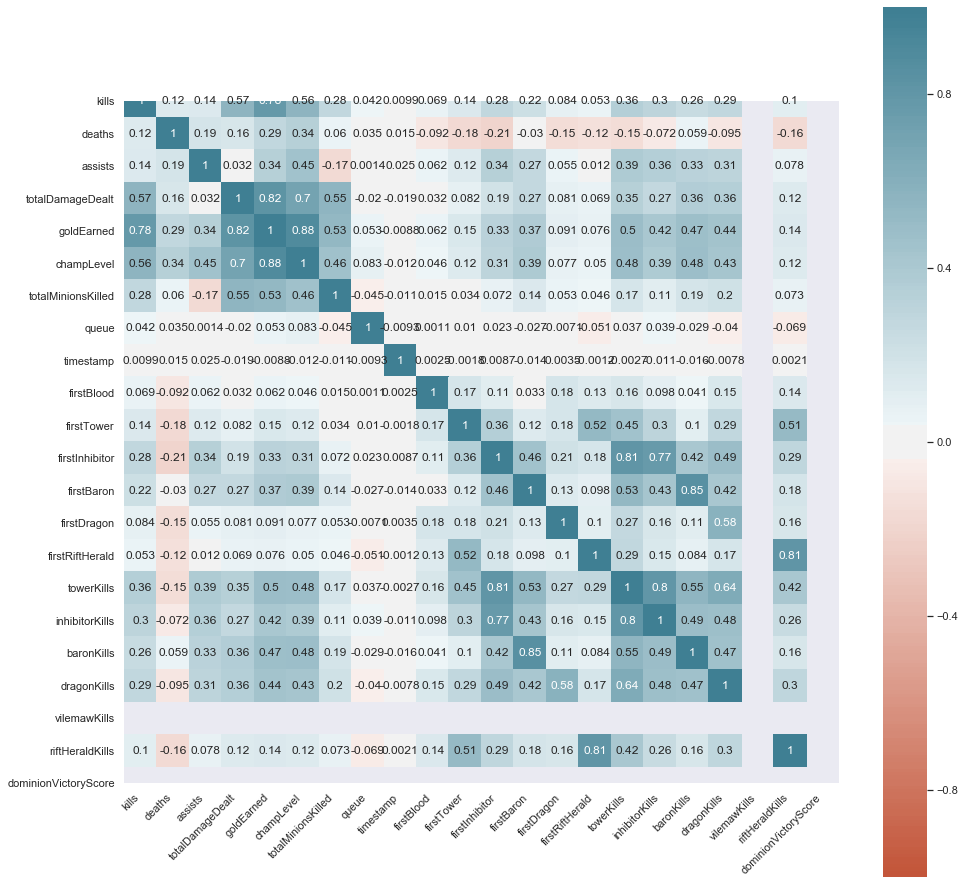

In [43]:
generate_corr_matrix(df_stats_joined)

#### Aqui para os valores mais escuros, acimas de 0,7 podemos ver algumas relações. Sendo as mais interessantesas ligadas ao ganhar o jogo ou nao.

In [ ]:
a = df_stats_joined[df_stats_joined.columns[0:-1]].apply(lambda x: x.corr(df_stats_joined['win']))

**Save Post Processed Data**

In [41]:
df_users_seed.to_csv("data/SummonerFinalData_PP.csv")

df_matches_acc_id.to_csv("data/matchByAccounbtIdFiltered10_PP.csv")

df_match_stats.to_csv("data/dataMatchesStats_PP.csv")

___________________
## Hipoteses Levantadas

1. A média de kills numa partida de MASTER é menor que a media de kills dos outros ranks.
2. Jogadores no diamond tem mais derrotas do que vitorias, ou seja win-rate é menor que 0.5.
3. O feitiço flash é escolhido por mais ou 90% dos jogadores em uma partida.
4. A media de last hits dos adc maior do que a média de last hits de qualquer outro role.

___________

In [42]:
from scipy import stats

_______________
**1. A média de kills numa partida de MASTER é menor que a media de kills dos outros ranks.**
- **H0: médiaMaster = médiaRanks**
- **H1: médiaMaster < médiaRanks** 
___________

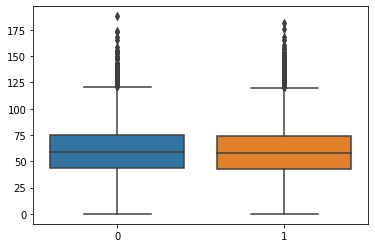

In [43]:
df_users_seed_PP = pd.read_csv("SummonerFinalData_PP.csv")
df_matches_acc_id_PP = pd.read_csv("matchByAccounbtIdFiltered10_PP.csv")
df_players_matches_stats_PP = pd.read_csv("playersMatchesStats_PP.csv")

users_master_list = df_users_seed_PP[df_users_seed_PP['tier'] == 'MASTER']['accountId'].to_list()
users_diamond_list = df_users_seed_PP[df_users_seed_PP['tier'] != 'MASTER']['accountId'].to_list()

diamond_matches = df_matches_acc_id_PP.query('accountId in @users_diamond_list')['gameId'].to_list()
master_matches = df_matches_acc_id_PP.query('accountId in @users_master_list')['gameId'].to_list()

kills_per_match = pd.DataFrame(df_players_matches_stats_PP.groupby('gameId')['kills'].sum())

diamond_kill_per_match = kills_per_match.query('gameId in @diamond_matches')
master_kill_per_match = kills_per_match.query('gameId in @master_matches')

data1 = diamond_kill_per_match['kills']
data2 = master_kill_per_match['kills']
sns.boxplot(data=[data1, data2])

In [44]:
master_kill_per_match.describe()

,kills
count,10251.000000
mean,59.671447
std,23.993197
min,0.000000
25%,43.000000
50%,58.000000
75%,74.000000
max,182.000000


In [218]:
stats.mannwhitneyu(master_kill_per_match,diamond_kill_per_match,alternative='less')

MannwhitneyuResult(statistic=39448489.5, pvalue=0.00016165102704971505)

**Como o p-value deu menor que 0.05 podemos desconsiderar a hipotese nula, portanto a hipotese que a média de kills numa partida de MASTER é menor que a media de kills dos outros ranks é verdadeira.**

__________
**2. Jogadores no diamond tem mais derrotas do que vitorias, ou seja a média do win-rate é menor que 0.5.**
- **H0: win_rate = 0.5**
- **H1: win_rate < 0.5**

___________

In [46]:
df_users_seed_PP = pd.read_csv("SummonerFinalData_PP.csv")

df_users_diamond = df_users_seed_PP[df_users_seed_PP['tier'] != 'MASTER']
stats.shapiro(df_users_diamond['win_rate'])

(0.9434006214141846, 1.7455864088275475e-16)

In [149]:
stats.wilcoxon(df_users_diamond['win_rate'] - 0.5, correction=False)

WilcoxonResult(statistic=25682.5, pvalue=5.402303070856499e-83)

**Como o p-value foi 1, isso quer dizer que aceitamos a hipotese nula e o número de vitórias dos jogadores no DIAMOND é maior que o número de derrotas**

--------
##### 3. O feitiço flash é escolhido por mais ou 90% dos jogadores em uma partida.
- **H0: p0 => 0.9 (null hyphotesis)**
- **H1: p < 0.9 **

###### codigo do flash:4
----------

In [ ]:
games_with_flash = df_players_matches_stats_PP[(df_players_matches_stats_PP.spell1 == 4) | (df_players_matches_stats_PP.spell2 == 4)]
games_with_flash = games_with_flash.groupby('gameId').size().reset_index(name='counts')

In [ ]:
games_with_flash['counts'].hist()

In [172]:
games_with_flash.describe()

,gameId,counts
count,1.736900e+04,17369.000000
mean,2.067664e+09,9.484599
std,9.032489e+06,0.854585
min,1.962178e+09,1.000000
25%,2.067025e+09,9.000000
50%,2.070593e+09,10.000000
75%,2.071945e+09,10.000000
max,2.073007e+09,10.000000


In [264]:
###Vamos criar uma distribuição randomica com media 9 e desvio padrao parecido com do dataset de games
lower = 1
upper = 10
mu = 9
sigma = 0.85
N = len(games_with_flash)
samples = stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce184c76d0>]],
      dtype=object)

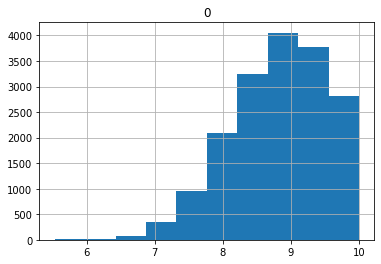

In [262]:
pd.DataFrame(samples).hist()

In [263]:
stats.mannwhitneyu(games_with_flash['counts'],samples,alternative='less')

MannwhitneyuResult(statistic=239355719.0, pvalue=1.0)

#### Para valores acima do valor critico de  0.05 falhamos em rejeitar a hipotese nula. Não temos evidencias para rejeitala. Assim O feitiço flash é escolhido por mais ou 90% dos jogadores em uma partida.